In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline, PchipInterpolator, UnivariateSpline
from numpy.testing import assert_allclose

ЗАДАЧА 1

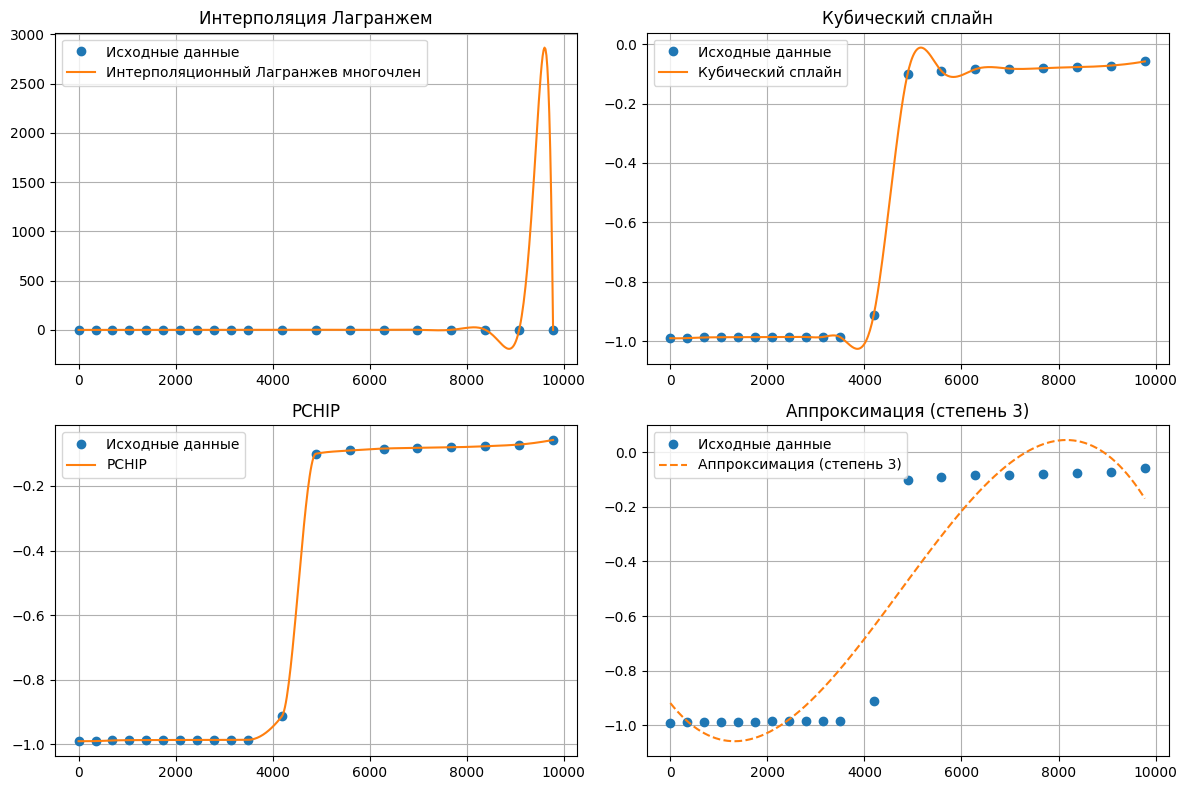

In [2]:
with np.load('data_interp.npz') as data:
    x1 = data['x1']
    y1 = data['y1']

poly_lagrange = lagrange(x1, y1)
cs = CubicSpline(x1, y1)
pchip = PchipInterpolator(x1, y1)
degree = 3
coeffs = np.polyfit(x1, y1, degree)
poly_approx_x = np.linspace(min(x1), max(x1), 500)
poly_approx_y = np.polyval(coeffs, poly_approx_x)

x_new = np.linspace(min(x1), max(x1), 500)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].plot(x1, y1, 'o', label='Исходные данные')
axs[0, 0].plot(x_new, poly_lagrange(x_new), label='Интерполяционный Лагранжев многочлен')
axs[0, 0].set_title('Интерполяция Лагранжем')
axs[0, 0].legend()
axs[0, 0].grid(True)


axs[0, 1].plot(x1, y1, 'o', label='Исходные данные')
axs[0, 1].plot(x_new, cs(x_new), label='Кубический сплайн')
axs[0, 1].set_title('Кубический сплайн')
axs[0, 1].legend()
axs[0, 1].grid(True)

axs[1, 0].plot(x1, y1, 'o', label='Исходные данные')
axs[1, 0].plot(x_new, pchip(x_new), label='PCHIP')
axs[1, 0].set_title('PCHIP')
axs[1, 0].legend()
axs[1, 0].grid(True)

axs[1, 1].plot(x1, y1, 'o', label='Исходные данные')
axs[1, 1].plot(poly_approx_x, poly_approx_y, '--', label=f'Аппроксимация (степень {degree})')
axs[1, 1].set_title(f'Аппроксимация (степень {degree})')
axs[1, 1].legend()
axs[1, 1].grid(True)


fig.tight_layout()
plt.show()

ЗАДАЧА 2

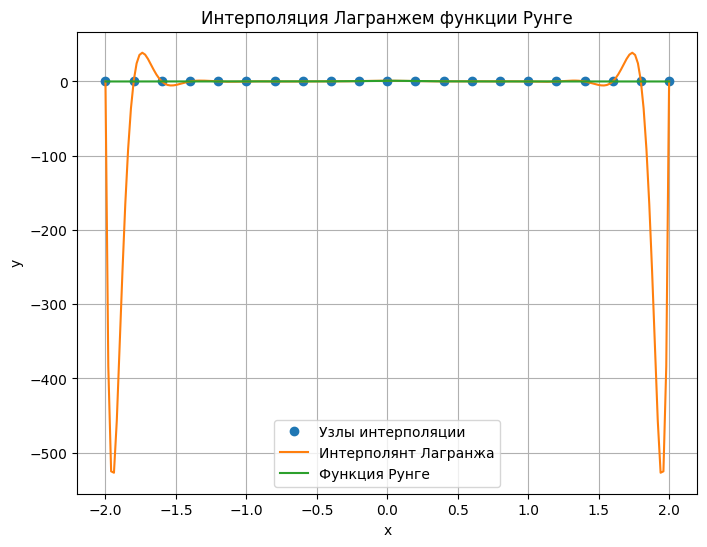

In [3]:
class LagrangeInterpolator:

    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)

    def __call__(self, x):
        x = np.asarray(x, dtype=float)
        result = np.zeros(x.shape, dtype=float) if x.ndim > 0 else 0.0

        for i in range(len(self.xk)):
            li = np.ones(x.shape, dtype=float) if x.ndim > 0 else 1.0
            for j in range(len(self.xk)):
                if i != j:
                    li *= (x - self.xk[j]) / (self.xk[i] - self.xk[j])
            result += self.yk[i] * li
        return result


def runge_func(x, a=25):
    return 1.0 / (1.0 + a * x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)


x_test = np.linspace(-2, 2, 200) 
y_test = lagr(x_test)

plt.figure(figsize=(8, 6))
plt.plot(xx, yy, 'o', label='Узлы интерполяции')
plt.plot(x_test, y_test, label='Интерполянт Лагранжа')
plt.plot(x_test, runge_func(x_test), label='Функция Рунге')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Интерполяция Лагранжем функции Рунге')
plt.legend()
plt.grid(True)
plt.show()

ЗАДАЧА 3

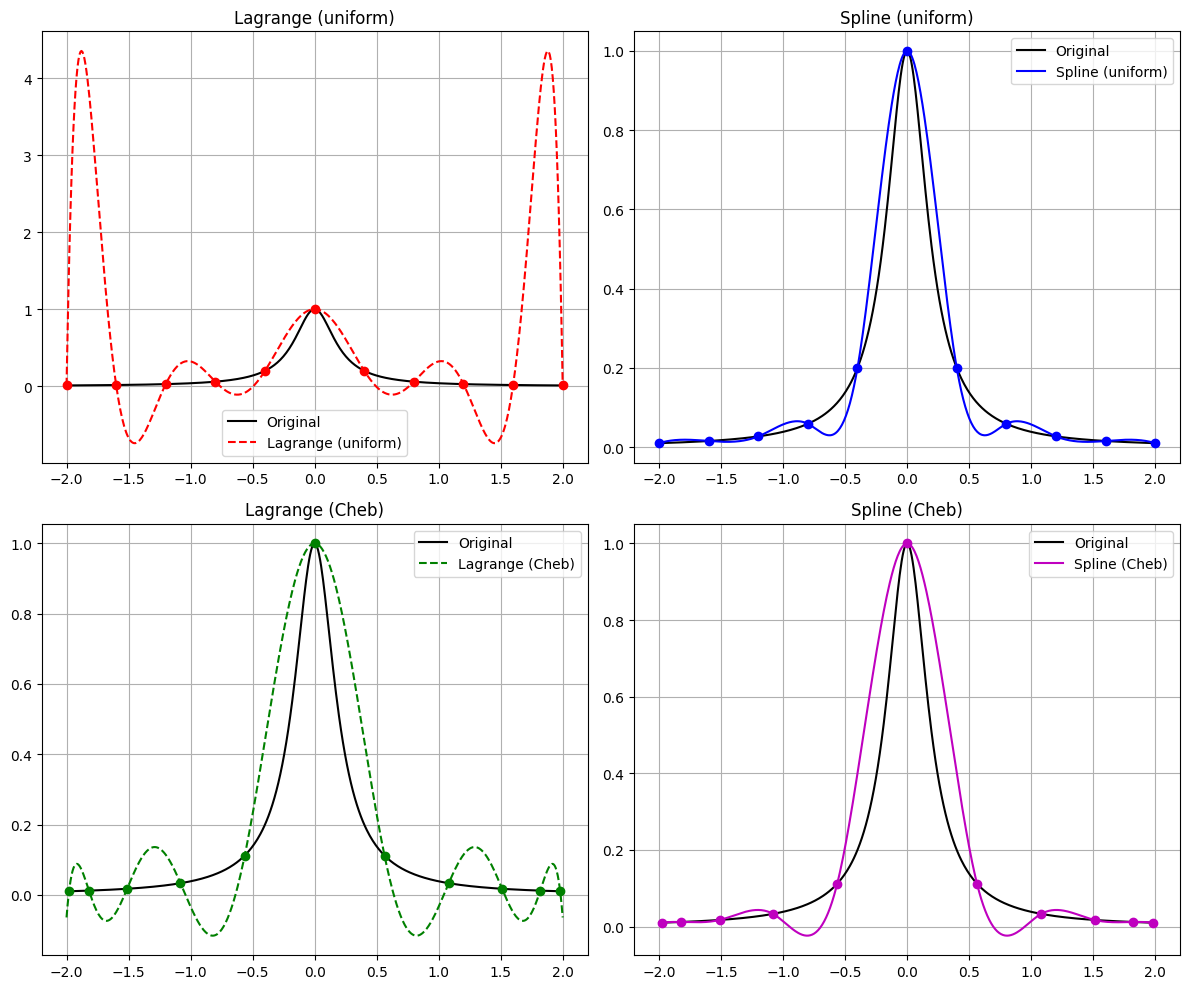

In [4]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a * x**2)

def cheb_nodes(n, a=-1, b=1):
    k = np.arange(1, n + 1)
    nodes = 0.5 * (a + b) + 0.5 * (b - a) * np.cos((2 * k - 1) * np.pi / (2 * n))
    return nodes

def lin_nodes(n,a,b):
  return np.linspace(a,b,n)

def lagr_interp(x, x_n, y_n):
    p = lagrange(x_n, y_n)
    return p(x)

def spline_interp(x, x_n, y_n):
    spl = CubicSpline(x_n, y_n)
    return spl(x)

n_nodes = 11

x_d = np.linspace(-2, 2, 500)
y_r_d = runge_func(x_d)

x_u = lin_nodes(n_nodes, -2, 2)
y_u = runge_func(x_u)

l_u = lagrange(x_u, y_u)
y_l_u = l_u(x_d)

cs_u = CubicSpline(x_u, y_u)
y_cs_u = cs_u(x_d)

x_c = cheb_nodes(n_nodes, a=-2, b=2)
y_c = runge_func(x_c)

l_c = lagrange(x_c, y_c)
y_l_c = l_c(x_d)

cs_c = CubicSpline(np.sort(x_c), runge_func(np.sort(x_c)))
y_cs_c = cs_c(x_d)

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax = ax.flatten()

ax[0].plot(x_d, y_r_d, 'k-', label="Original")
ax[0].plot(x_d, y_l_u, 'r--', label="Lagrange (uniform)")
ax[0].scatter(x_u, y_u, color='r', zorder=5)
ax[0].set_title("Lagrange (uniform)")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(x_d, y_r_d, 'k-', label="Original")
ax[1].plot(x_d, y_cs_u, 'b-', label="Spline (uniform)")
ax[1].scatter(x_u, y_u, color='b', zorder=5)
ax[1].set_title("Spline (uniform)")
ax[1].legend()
ax[1].grid(True)

ax[2].plot(x_d, y_r_d, 'k-', label="Original")
ax[2].plot(x_d, y_l_c, 'g--', label="Lagrange (Cheb)")
ax[2].scatter(x_c, y_c, color='g', zorder=5)
ax[2].set_title("Lagrange (Cheb)")
ax[2].legend()
ax[2].grid(True)

ax[3].plot(x_d, y_r_d, 'k-', label="Original")
ax[3].plot(x_d, y_cs_c, 'm-', label="Spline (Cheb)")
ax[3].scatter(x_c, y_c, color='m', zorder=5)
ax[3].set_title("Spline (Cheb)")
ax[3].legend()
ax[3].grid(True)

plt.tight_layout()
plt.show()

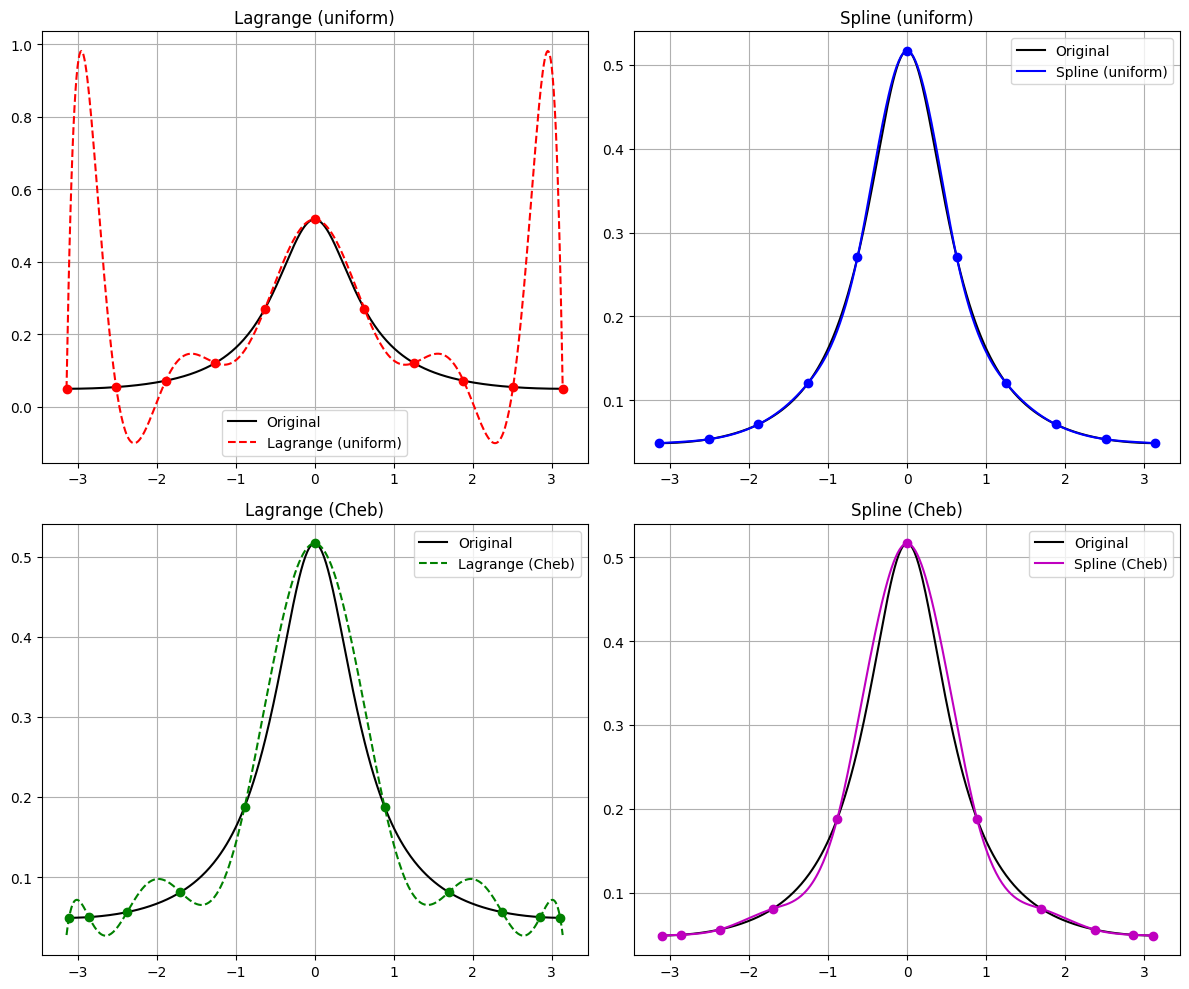

In [5]:
e = 0.21

def u_func(x):
    return (e * (e + 2))**(1/2) / (2 * np.pi * (1 + e - np.cos(x)))

def cheb_nodes(n, a, b):
    k = np.arange(1, n + 1)
    return 0.5 * (a + b) + 0.5 * (b - a) * np.cos((2 * k - 1) * np.pi / (2 * n))

n_n = 11

x_d = np.linspace(-np.pi, np.pi, 500)
y_u_d = u_func(x_d)

x_u = np.linspace(-np.pi, np.pi, n_n)
y_u = u_func(x_u)

l_u = lagrange(x_u, y_u)
y_l_u = l_u(x_d)

cs_u = CubicSpline(x_u, y_u)
y_cs_u = cs_u(x_d)

x_c = cheb_nodes(n_n, a=-np.pi, b=np.pi)
y_c = u_func(x_c)

l_c = lagrange(x_c, y_c)
y_l_c = l_c(x_d)

cs_c = CubicSpline(np.sort(x_c), u_func(np.sort(x_c)))
y_cs_c = cs_c(x_d)

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax = ax.flatten()

ax[0].plot(x_d, y_u_d, 'k-', label="Original")
ax[0].plot(x_d, y_l_u, 'r--', label="Lagrange (uniform)")
ax[0].scatter(x_u, y_u, color='r', zorder=5)
ax[0].set_title("Lagrange (uniform)")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(x_d, y_u_d, 'k-', label="Original")
ax[1].plot(x_d, y_cs_u, 'b-', label="Spline (uniform)")
ax[1].scatter(x_u, y_u, color='b', zorder=5)
ax[1].set_title("Spline (uniform)")
ax[1].legend()
ax[1].grid(True)

ax[2].plot(x_d, y_u_d, 'k-', label="Original")
ax[2].plot(x_d, y_l_c, 'g--', label="Lagrange (Cheb)")
ax[2].scatter(x_c, y_c, color='g', zorder=5)
ax[2].set_title("Lagrange (Cheb)")
ax[2].legend()
ax[2].grid(True)

ax[3].plot(x_d, y_u_d, 'k-', label="Original")
ax[3].plot(x_d, y_cs_c, 'm-', label="Spline (Cheb)")
ax[3].scatter(x_c, y_c, color='m', zorder=5)
ax[3].set_title("Spline (Cheb)")
ax[3].legend()
ax[3].grid(True)

plt.tight_layout()
plt.show()

ЗАДАЧА 4

Optimal s: 10.0


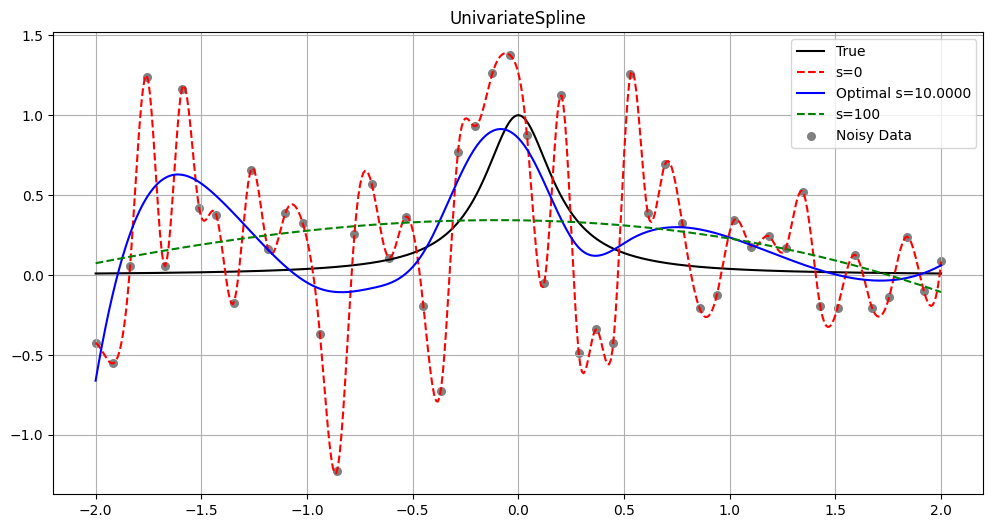

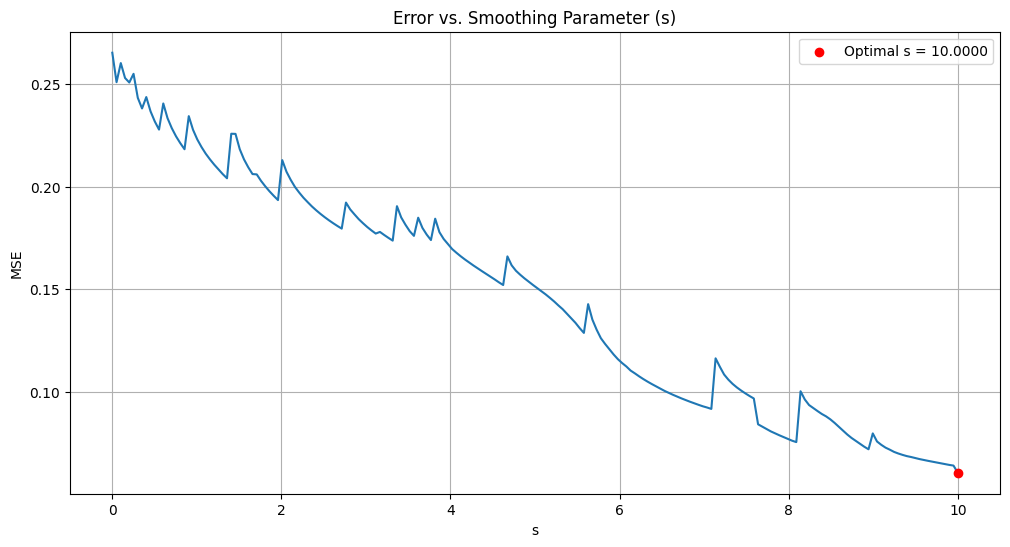

In [6]:
def runge(x):
    return 1 / (1 + 25 * x**2)

def generate_noisy_data(func, n, noise_level=0.5):
    x = np.linspace(-2, 2, n)
    y = func(x)
    noise = noise_level * np.random.randn(n)
    y_noisy = y + noise
    return x, y_noisy, y

def find_optimal_s(x, y_noisy, y_true, s_values):
    errors = []
    for s in s_values:
        spl = UnivariateSpline(x, y_noisy, s=s)
        y_spline = spl(x)
        error = np.mean((y_spline - y_true)**2)
        errors.append(error)
    optimal_s = s_values[np.argmin(errors)]
    return optimal_s, errors

n_points = 50
x, y_n, y_true = generate_noisy_data(runge, n_points)

s_v = np.linspace(0, 10, 200)
opt_s, err = find_optimal_s(x, y_n, y_true, s_v)

print(f"Optimal s: {opt_s}")

spl_opt = UnivariateSpline(x, y_n, s=opt_s)
spl_0 = UnivariateSpline(x, y_n, s=0) 
spl_high = UnivariateSpline(x, y_n, s=100) 

x_p = np.linspace(-2, 2, 500)
y_opt = spl_opt(x_p)
y_0 = spl_0(x_p)
y_high = spl_high(x_p)

plt.figure(figsize=(12, 6))
plt.plot(x_p, runge(x_p), 'k-', label='True')
plt.plot(x_p, y_0, 'r--', label='s=0')
plt.plot(x_p, y_opt, 'b-', label=f'Optimal s={opt_s:.4f}')
plt.plot(x_p, y_high, 'g--', label=f's=100')

plt.scatter(x, y_n, color='gray', s=30, label='Noisy Data')
plt.title('UnivariateSpline')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(s_v, err)
plt.xlabel("s")
plt.ylabel("MSE")
plt.title("Error vs. Smoothing Parameter (s)")
plt.grid(True)

min_error = min(err)
plt.scatter(opt_s, min_error, color='r', zorder=5, label=f'Optimal s = {opt_s:.4f}')

plt.legend()
plt.show()

ЗАДАЧА 5

Optimal h: 1
Optimal s: 150.0


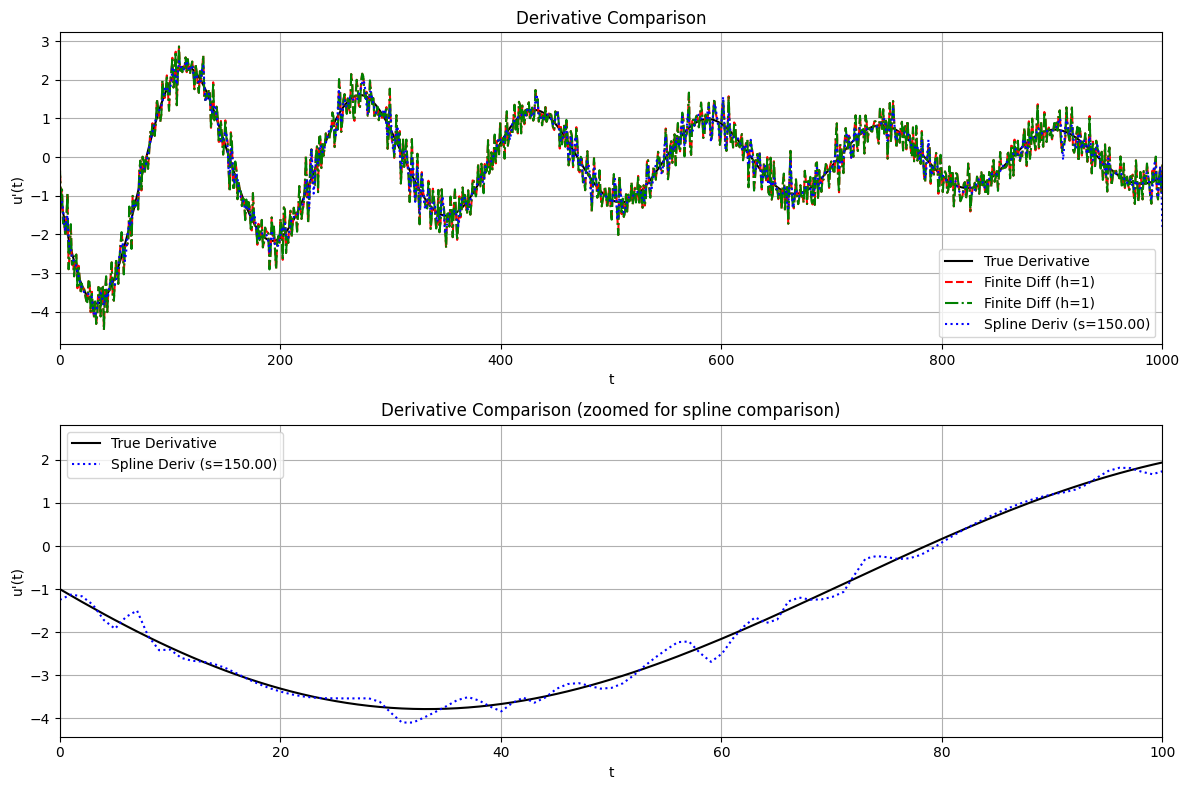

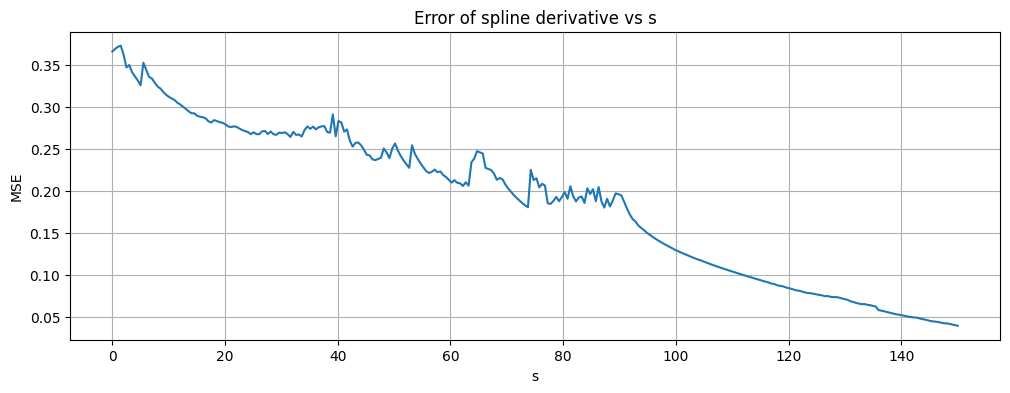

MSE (h=1): 0.12289203663084677
MSE (optimal h): 0.12289203663084677
MSE (optimal s): 0.03971064572393859


In [7]:
def u_func(t, a=200, b=0.5, c=0.04, d=200):
    return a / (1 + t / d) * (b + b * np.cos(c * t))

def u_deriv(t, a=200, b=0.5, c=0.04, d=200):
    term1 = -a * (b + b*np.cos(c*t)) / (d * (1 + t/d)**2)
    term2 = a * (-b * c * np.sin(c*t)) / (1 + t/d)
    return term1 + term2

def finite_diff(t, u, h):
    deriv = (np.roll(u, -h) - np.roll(u, h)) / (np.roll(t, -h) - np.roll(t, h))
    return deriv

def optimal_h(t, u, eps):
    m2 = np.max(np.abs(u_deriv(t)))
    h_opt = (eps / m2)**0.5
    h = np.argmin(np.abs(t[1]-t[0]- h_opt)) +1
    return h

def find_optimal_s(t, u, u_deriv_true, s_vals):

    errors = []
    for s in s_vals:
      spl = UnivariateSpline(t,u,s=s)
      u_der_spl = spl.derivative()(t)
      err = np.mean((u_der_spl - u_deriv_true)**2)
      errors.append(err)

    opt_s = s_vals[np.argmin(errors)]
    return opt_s,errors

n = 1000
t = np.linspace(0, 1000, n)
noise_amp = 0.5
noise = noise_amp * np.random.randn(n)

u = u_func(t) + noise
u_true = u_func(t)
u_der_true = u_deriv(t)

eps = np.std(noise)
h_opt = optimal_h(t,u,eps)

u_der_fd = finite_diff(t, u, 1)
u_der_fd_opt = finite_diff(t,u, h_opt)

s_v = np.linspace(0,150, 300)
opt_s, err = find_optimal_s(t,u,u_der_true,s_v)
print(f"Optimal h: {h_opt}")
print(f"Optimal s: {opt_s}")

spl = UnivariateSpline(t, u, s=opt_s)
u_der_spl = spl.derivative()(t)

plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.plot(t, u_der_true, 'k-', label="True Derivative")
plt.plot(t, u_der_fd, 'r--', label="Finite Diff (h=1)")
plt.plot(t, u_der_fd_opt, 'g-.', label=f"Finite Diff (h={h_opt})")
plt.plot(t, u_der_spl, 'b:', label=f"Spline Deriv (s={opt_s:.2f})")

plt.xlabel("t")
plt.ylabel("u'(t)")
plt.title("Derivative Comparison")
plt.legend()
plt.grid(True)
plt.xlim(0,1000)

plt.subplot(2,1,2)
plt.plot(t, u_der_true, 'k-', label = "True Derivative")
plt.plot(t, u_der_spl, 'b:', label=f"Spline Deriv (s={opt_s:.2f})")

plt.xlabel("t")
plt.ylabel("u'(t)")
plt.title("Derivative Comparison (zoomed for spline comparison)")
plt.legend()
plt.grid(True)
plt.xlim(0,100)


plt.tight_layout()
plt.show()

plt.figure(figsize=(12,4))
plt.plot(s_v,err)
plt.xlabel("s")
plt.ylabel("MSE")
plt.title("Error of spline derivative vs s")
plt.grid(True)
plt.show()

print(f"MSE (h=1): {np.mean( (u_der_fd - u_der_true)**2  )}")
print(f"MSE (optimal h): {np.mean( (u_der_fd_opt - u_der_true)**2  )}")
print(f"MSE (optimal s): {np.mean((u_der_spl - u_der_true)**2  )}")